In [320]:
# Importing necessarry libraries
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [321]:
# importing the csv file
df1 = pd.read_csv('table_1.csv')
df2 = pd.read_csv('table_02.csv')
df3 = pd.read_csv('table_03.csv')

In [322]:
# lets merge the dataframe on the basis on serial number
df = pd.merge(df1, df2, on='serial number', how='inner')
df = pd.merge(df, df3, on='serial number', how='inner')

In [323]:
pd.set_option('display.max_columns',None)
df.head()

,serial number,bhk type,property type,beds,bathroom,balocny,address,city,state code,country,landmark,carpet area,status,floor,transaction type,year built,price per sqft,furnished status,facing,car parking,type of ownership,booking amount,buy total price
0,1,3.0,Mobile Home,3.0,2.0,NaN,"825 N Lamb Blvd, 118,Las Vegas, NV 89110",Las Vegas,NV,United states,Moore William K...,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,7772014
1,2,2.0,Condo,2.0,2.0,NaN,"5138 S Jones Boulevard, 206,Las Vegas, NV 89118",Las Vegas,NV,United states,Alamo Tony Elementary...,920.0,NaN,NaN,NaN,1989.0,20915.0,NaN,NaN,NaN,NaN,NaN,19241716
2,3,1.0,Condo,1.0,1.0,NaN,"4670 Monterey Circle, 1,Las Vegas, NV 89169",Las Vegas,NV,United states,Paradise Prof Dev...,1000.0,NaN,NaN,NaN,1973.0,19660.0,NaN,NaN,NaN,NaN,NaN,19660100
3,4,NaN,Land,NaN,NaN,NaN,"4924 E Washington Avenue,Las Vegas, NV 89110",Las Vegas,NV,United states,Earl Ira J...,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,22420880
4,5,3.0,House,3.0,2.0,NaN,"321 Beaumont Street,Las Vegas, NV 89106",Las Vegas,NV,United states,Wasden Howard Elementary...,1334.0,NaN,NaN,NaN,2000.0,16933.0,NaN,NaN,NaN,NaN,NaN,22588200


In [324]:
df.shape

(4056, 23)

##### thus our data has 4056 rows and 23 columns

## Stastical analysis

In [325]:
# lets check if there are any null values
df.duplicated().sum()

0

#### Let check if any whitespace, 'NA' or '-' exist in dataset.

In [326]:
df.isin([' ','NA','-']).sum().any()

False

#### Missing value check

In [327]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
booking amount               4056      100.000000
car parking                  4056      100.000000
furnished status             4056      100.000000
type of ownership            4056      100.000000
transaction type             4056      100.000000
floor                        4056      100.000000
status                       4056      100.000000
facing                       4056      100.000000
balocny                      4056      100.000000
price per sqft                492       12.130178
carpet area                   492       12.130178
property type                 414       10.207101
bathroom                      285        7.026627
bhk type                      142        3.500986
beds                          142        3.500986
landmark                       59        1.454635
state code                      1        0.024655
city                            1        0.024655
address                         1        0.024655


#### observation and conclusion:
- Booking amount, car parking, furnished status, type of ownership, transaction type,  floor, status, facing , balocny are all null columns it no data found on the website regarding that so we will drop those columns.  

In [328]:
df.drop(columns=["booking amount","car parking","furnished status","type of ownership","transaction type","floor","status","facing","balocny"],inplace=True)

In [329]:
df.head()

,serial number,bhk type,property type,beds,bathroom,address,city,state code,country,landmark,carpet area,year built,price per sqft,buy total price
0,1,3.0,Mobile Home,3.0,2.0,"825 N Lamb Blvd, 118,Las Vegas, NV 89110",Las Vegas,NV,United states,Moore William K...,NaN,2000.0,NaN,7772014
1,2,2.0,Condo,2.0,2.0,"5138 S Jones Boulevard, 206,Las Vegas, NV 89118",Las Vegas,NV,United states,Alamo Tony Elementary...,920.0,1989.0,20915.0,19241716
2,3,1.0,Condo,1.0,1.0,"4670 Monterey Circle, 1,Las Vegas, NV 89169",Las Vegas,NV,United states,Paradise Prof Dev...,1000.0,1973.0,19660.0,19660100
3,4,NaN,Land,NaN,NaN,"4924 E Washington Avenue,Las Vegas, NV 89110",Las Vegas,NV,United states,Earl Ira J...,NaN,2000.0,NaN,22420880
4,5,3.0,House,3.0,2.0,"321 Beaumont Street,Las Vegas, NV 89106",Las Vegas,NV,United states,Wasden Howard Elementary...,1334.0,2000.0,16933.0,22588200


In [330]:
df.isnull().sum()

serial number        0
bhk type           142
property type      414
beds               142
bathroom           285
address              1
city                 1
state code           1
country              0
landmark            59
carpet area        492
year built           0
price per sqft     492
buy total price      0
dtype: int64

In [331]:
# filling the null values in bhk and beds with the median
df["bhk type"] = df["bhk type"].fillna(df["bhk type"].median())
df["beds"] = df["beds"].fillna(df["beds"].median())


In [332]:
df["property type"].value_counts()

property type
House                2221
Condo                 831
Townhouse             255
Land                  114
Duplex                 95
For Sale               57
Multi-Family Home      22
Co-op                  18
Mobile Home            15
Apartment              10
Farm                    4
Name: count, dtype: int64

In [333]:
mask = (df['property type'] == 'Land') | (df['property type'] == 'Farm')

In [334]:
df = df[~mask]

In [335]:
mask = (df['property type'] == 'For Sale')
df = df[~mask]
df["property type"].value_counts()

property type
House                2221
Condo                 831
Townhouse             255
Duplex                 95
Multi-Family Home      22
Co-op                  18
Mobile Home            15
Apartment              10
Name: count, dtype: int64

In [336]:
df.shape

(3881, 14)

In [337]:
mask = ~df['property type'].isin(['House', 'Condo'])
df.loc[mask, 'property type'] = 'Other'

In [338]:
df["property type"].value_counts()

property type
House    2221
Condo     831
Other     829
Name: count, dtype: int64

In [339]:
# lets handle bathroom column
df["bathroom"].isnull().sum()

151

In [340]:
df["bathroom"] = df["bathroom"].fillna(df["bathroom"].median())

In [341]:
# lets handle price per sqft and carpet area column
df["price per sqft"].median()

21401.0

In [342]:
df["price per sqft"] = df["price per sqft"].replace(0.0,(df["price per sqft"].median()))

In [343]:
df = df[(df['price per sqft'] >= 0) & (df['buy total price'] >= 0)]
df = df[(df["carpet area"]>=0)]

In [344]:
# lets replace their nan vlaues by median()
df["price per sqft"] = df["price per sqft"].fillna(df["price per sqft"].median())
df["carpet area"] = df["carpet area"].fillna(df["carpet area"].median())

In [345]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
landmark                     41        1.161473
serial number                 0        0.000000
bhk type                      0        0.000000
property type                 0        0.000000
beds                          0        0.000000
bathroom                      0        0.000000
address                       0        0.000000
city                          0        0.000000
state code                    0        0.000000
country                       0        0.000000
carpet area                   0        0.000000
year built                    0        0.000000
price per sqft                0        0.000000
buy total price               0        0.000000


In [346]:
df["state code"].isnull().sum()

0

In [347]:
df = df.dropna(subset=['city'], inplace=False)

In [348]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
landmark                     41        1.161473
serial number                 0        0.000000
bhk type                      0        0.000000
property type                 0        0.000000
beds                          0        0.000000
bathroom                      0        0.000000
address                       0        0.000000
city                          0        0.000000
state code                    0        0.000000
country                       0        0.000000
carpet area                   0        0.000000
year built                    0        0.000000
price per sqft                0        0.000000
buy total price               0        0.000000


#### data is free from null values now  and about that landmark column we are going to drop that in further process 

In [349]:
df.dtypes

serial number        int64
bhk type           float64
property type       object
beds               float64
bathroom           float64
address             object
city                object
state code          object
country             object
landmark            object
carpet area        float64
year built         float64
price per sqft     float64
buy total price      int64
dtype: object

In [350]:
# dropping unnecessary columns
df.drop(columns=["address","landmark"],inplace=True)

In [351]:
df.head()

,serial number,bhk type,property type,beds,bathroom,city,state code,country,carpet area,year built,price per sqft,buy total price
1,2,2.0,Condo,2.0,2.0,Las Vegas,NV,United states,920.0,1989.0,20915.0,19241716
2,3,1.0,Condo,1.0,1.0,Las Vegas,NV,United states,1000.0,1973.0,19660.0,19660100
4,5,3.0,House,3.0,2.0,Las Vegas,NV,United states,1334.0,2000.0,16933.0,22588200
5,6,1.0,Condo,1.0,1.0,Las Vegas,NV,United states,786.0,2000.0,29270.0,23006500
6,7,2.0,Condo,2.0,2.0,Las Vegas,NV,United states,1054.0,2004.0,25320.0,26687540


## data Visualization 

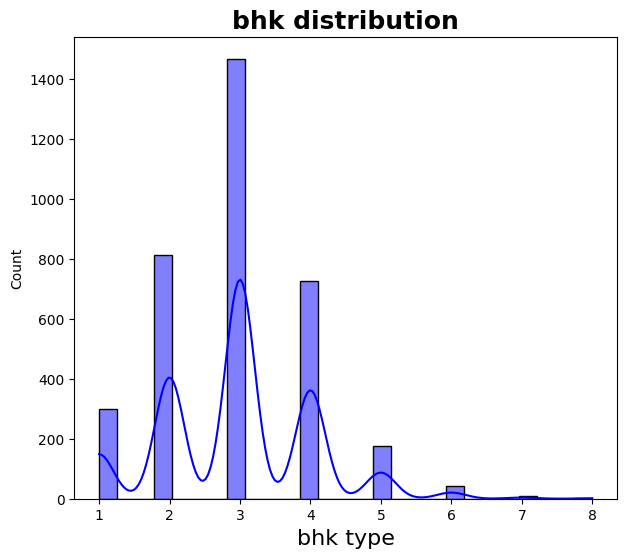

In [352]:
plt.figure(figsize=(7,6))
sns.histplot(df["bhk type"], kde=True, color='b')
plt.xlabel('bhk type',fontsize=16)
plt.title('bhk distribution', fontsize=18,fontweight ='bold')
plt.show()

##### most of the data in the dataset belong to the 3 bhk type

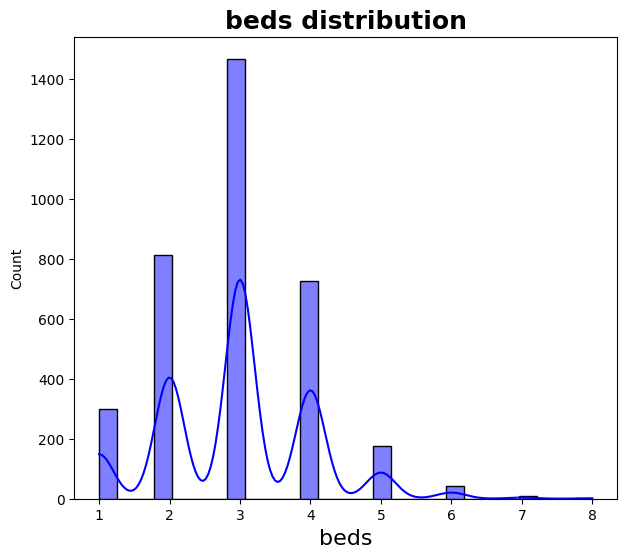

In [353]:
plt.figure(figsize=(7,6))
sns.histplot(df["beds"], kde=True, color='b')
plt.xlabel('beds',fontsize=16)
plt.title('beds distribution', fontsize=18,fontweight ='bold')
plt.show()

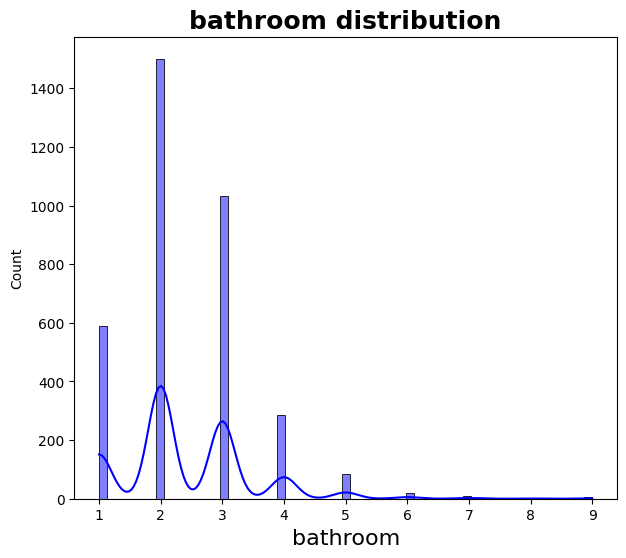

In [354]:
plt.figure(figsize=(7,6))
sns.histplot(df["bathroom"], kde=True, color='b')
plt.xlabel('bathroom',fontsize=16)
plt.title('bathroom distribution', fontsize=18,fontweight ='bold')
plt.show()

##### as we can see the data contains more records which has 2 number of  bathrooms

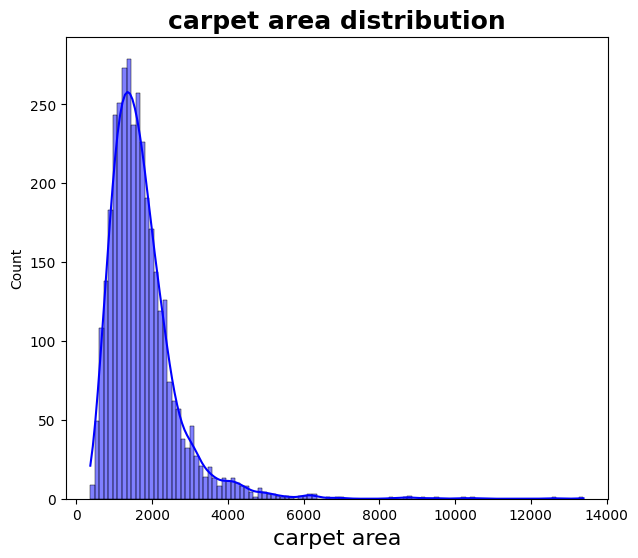

In [355]:
plt.figure(figsize=(7,6))
sns.histplot(df["carpet area"], kde=True, color='b')
plt.xlabel('carpet area',fontsize=16)
plt.title('carpet area distribution', fontsize=18,fontweight ='bold')
plt.show()

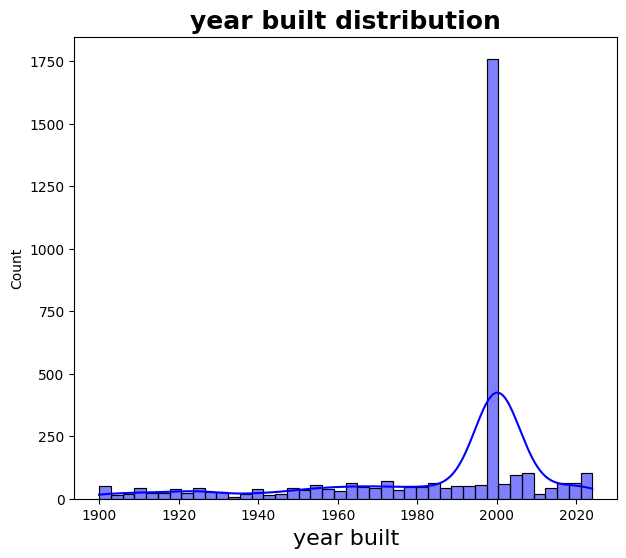

In [356]:
plt.figure(figsize=(7,6))
sns.histplot(df["year built"], kde=True, color='b')
plt.xlabel('year built',fontsize=16)
plt.title('year built distribution', fontsize=18,fontweight ='bold')
plt.show()

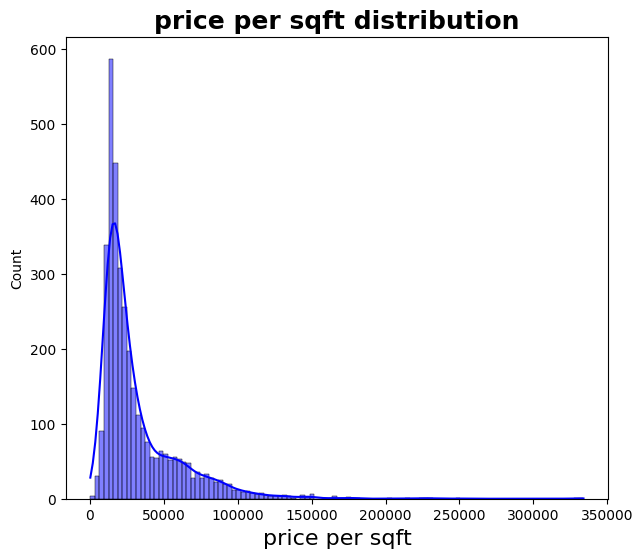

In [357]:
plt.figure(figsize=(7,6))
sns.histplot(df["price per sqft"], kde=True, color='b')
plt.xlabel('price per sqft',fontsize=16)
plt.title('price per sqft distribution', fontsize=18,fontweight ='bold')
plt.show()

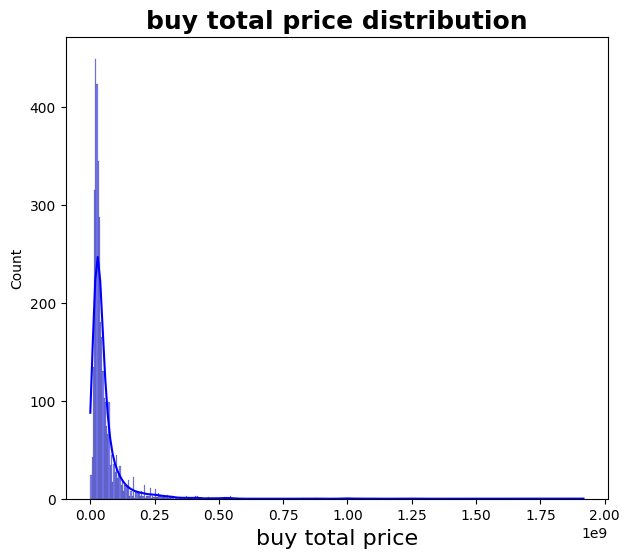

In [358]:
plt.figure(figsize=(7,6))
sns.histplot(df["buy total price"], kde=True, color='b')
plt.xlabel('buy total price',fontsize=16)
plt.title('buy total price distribution', fontsize=18,fontweight ='bold')
plt.show()

#### lets compare bhk type in different cities

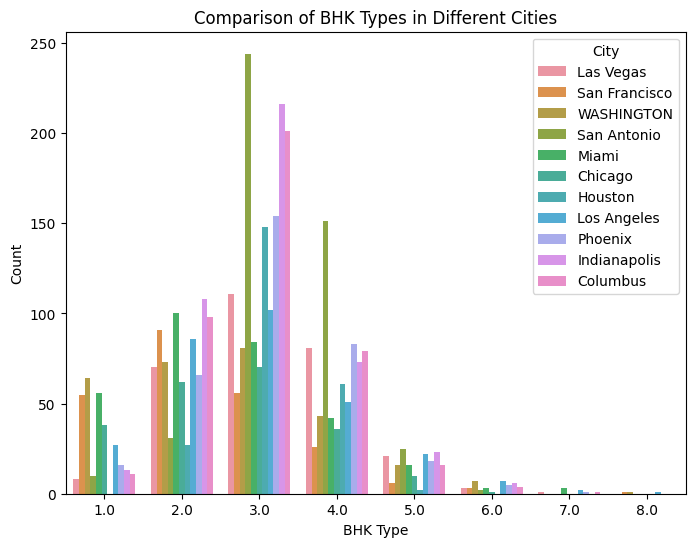

In [359]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["bhk type"], hue='city', data=df)
plt.title('Comparison of BHK Types in Different Cities')
plt.xlabel('BHK Type')
plt.ylabel('Count')
plt.legend(title='City')
plt.show()

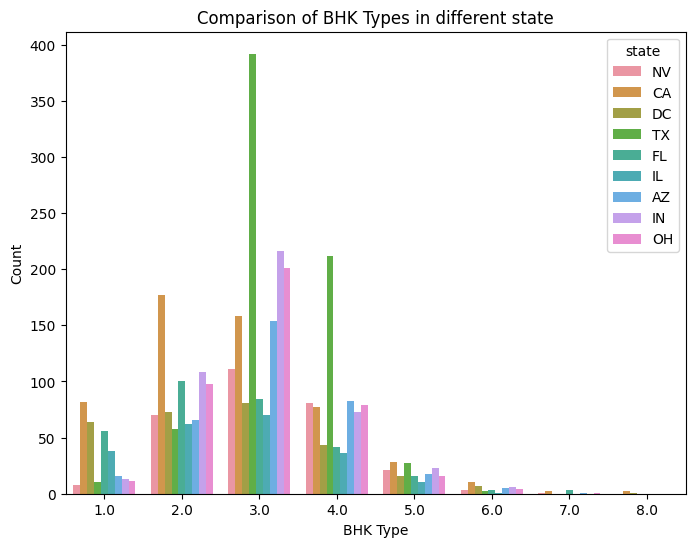

In [360]:
#### now lets compare bhk type with different state
plt.figure(figsize=(8, 6))
sns.countplot(x=df["bhk type"], hue='state code', data=df)
plt.title('Comparison of BHK Types in different state')
plt.xlabel('BHK Type')
plt.ylabel('Count')
plt.legend(title='state')
plt.show()

#### lets compare year built and price per sqft

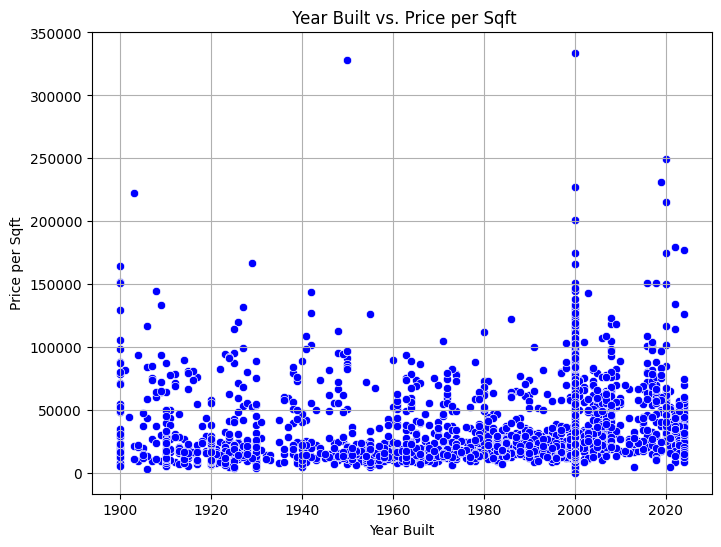

In [361]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['year built'], y=df['price per sqft'], color='b', marker='o')
plt.xlabel('Year Built')
plt.ylabel('Price per Sqft')
plt.title(' Year Built vs. Price per Sqft')
plt.grid(True)
plt.show()

#### lets compare price per sqft vs buy total price

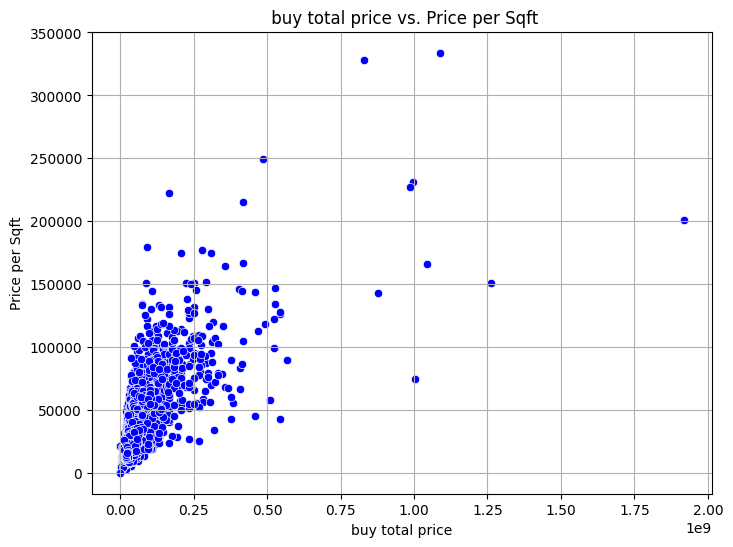

In [362]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['buy total price'], y=df['price per sqft'], color='b', marker='o')
plt.xlabel('buy total price')
plt.ylabel('Price per Sqft')
plt.title(' buy total price vs. Price per Sqft')
plt.grid(True)
plt.show()

##### as we can see there seems to be the direct relation between the buy total price and price per sqft which is obvious as price per sqft depends upon the buy total price

#### lets compare property type with state

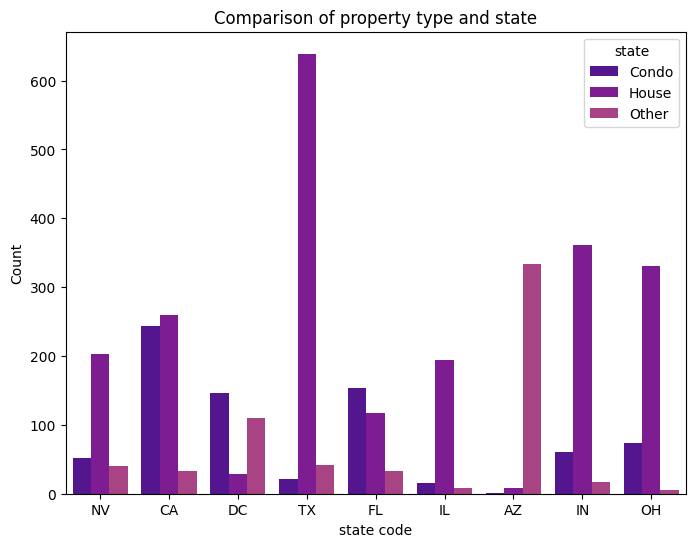

In [363]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["state code"], hue='property type', data=df)
plt.title('Comparison of property type and state')
plt.xlabel('state code')
plt.ylabel('Count')
plt.legend(title='state')
plt.show()

####  Observaitons:
- as we can see most of the data in the dataset belong to the house category
- but in AZ most of the data is for other category \
- and in CA state data for house and condo are almost equal

## Feature selection and Engineering

In [364]:
float_columns = ["bhk type","beds","bathroom","carpet area","price per sqft","buy total price"]
df[float_columns] = df[float_columns].astype(int)

In [365]:
df.reset_index(drop=True, inplace=True)

### 1)  outliers detection and removal

In [366]:
len(Numerical)

6

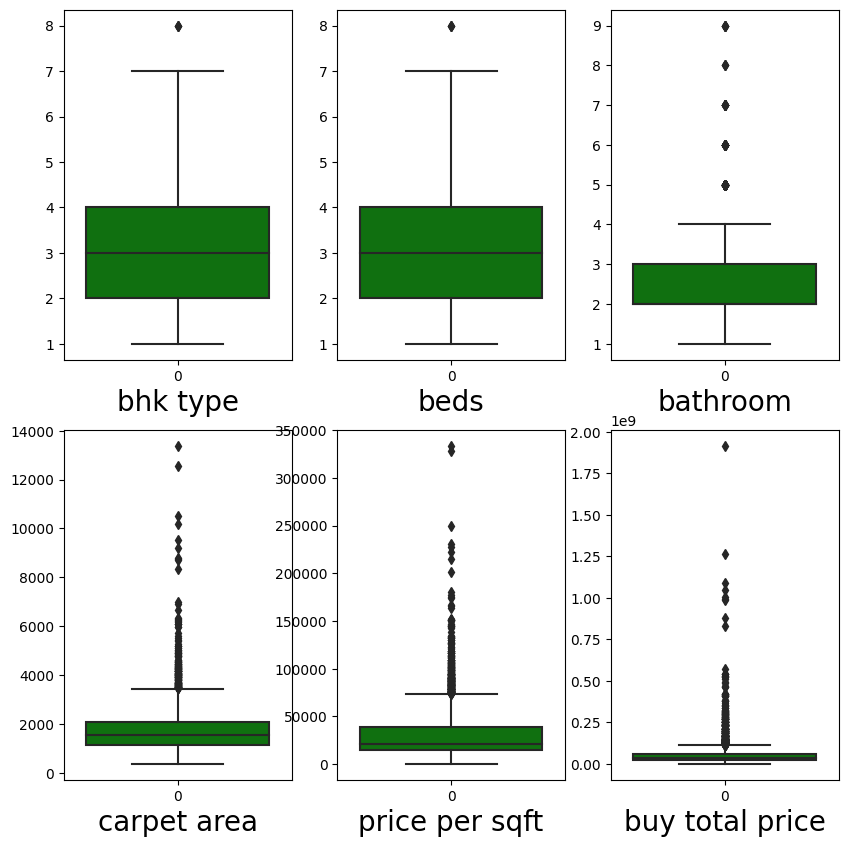

In [367]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### observation and conclusion:
- columns like bhk type and beds and bathroom has less number of outliers.
- while some columns wiz. carpet area, price per sqft , buy total price has some more outliers.

### Removal of outliers using Zscore method

In [368]:
Numerical = ["bhk type","beds","bathroom","carpet area","price per sqft","buy total price"]

In [369]:
from scipy.stats import zscore
z = np.abs(zscore(df[Numerical]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (3530, 12)
Shape of the dataframe after removing outliers:  (3394, 12)
Percentage of data loss post outlier removal:  3.8526912181303117


### 2)skewness of feature

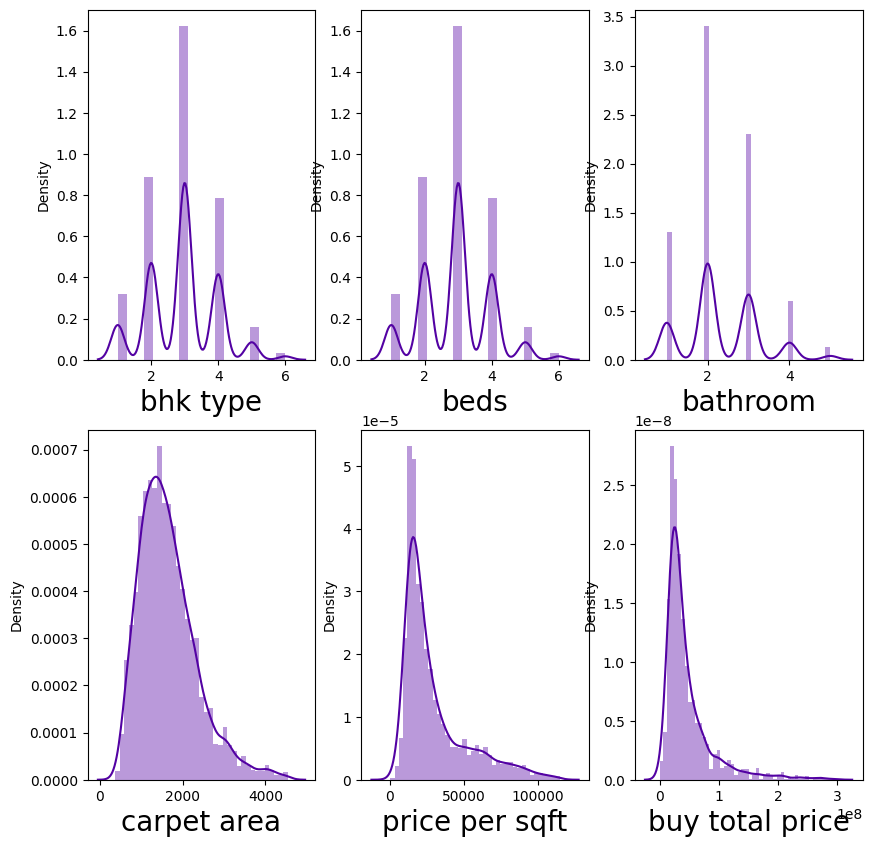

In [370]:
plt.figure(figsize=(10,10),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [371]:
df[Numerical].skew()

bhk type           0.121029
beds               0.121029
bathroom           0.476344
carpet area        1.064746
price per sqft     1.583052
buy total price    2.629965
dtype: float64

In [372]:
df

,serial number,bhk type,property type,beds,bathroom,city,state code,country,carpet area,year built,price per sqft,buy total price
0,2,2,Condo,2,2,Las Vegas,NV,United states,920,1989.0,20915,19241716
1,3,1,Condo,1,1,Las Vegas,NV,United states,1000,1973.0,19660,19660100
2,5,3,House,3,2,Las Vegas,NV,United states,1334,2000.0,16933,22588200
3,6,1,Condo,1,1,Las Vegas,NV,United states,786,2000.0,29270,23006500
4,7,2,Condo,2,2,Las Vegas,NV,United states,1054,2004.0,25320,26687540
...,...,...,...,...,...,...,...,...,...,...,...,...
3525,4052,4,House,4,2,San Antonio,TX,United states,1627,2000.0,11878,19325376
3526,4053,4,House,4,2,San Antonio,TX,United states,1492,2000.0,13401,19994656
3527,4054,4,House,4,2,San Antonio,TX,United states,1627,2000.0,12495,20329296
3528,4055,3,House,3,3,San Antonio,TX,United states,1437,2000.0,14264,20496700


### 3) correlation

In [373]:
df[Numerical].corr()

,bhk type,beds,bathroom,carpet area,price per sqft,buy total price
bhk type,1.000000,1.000000,0.596210,0.711180,-0.257760,0.184224
beds,1.000000,1.000000,0.596210,0.711180,-0.257760,0.184224
bathroom,0.596210,0.596210,1.000000,0.752166,-0.032730,0.398773
carpet area,0.711180,0.711180,0.752166,1.000000,-0.122566,0.422602
price per sqft,-0.257760,-0.257760,-0.032730,-0.122566,1.000000,0.768576
buy total price,0.184224,0.184224,0.398773,0.422602,0.768576,1.000000


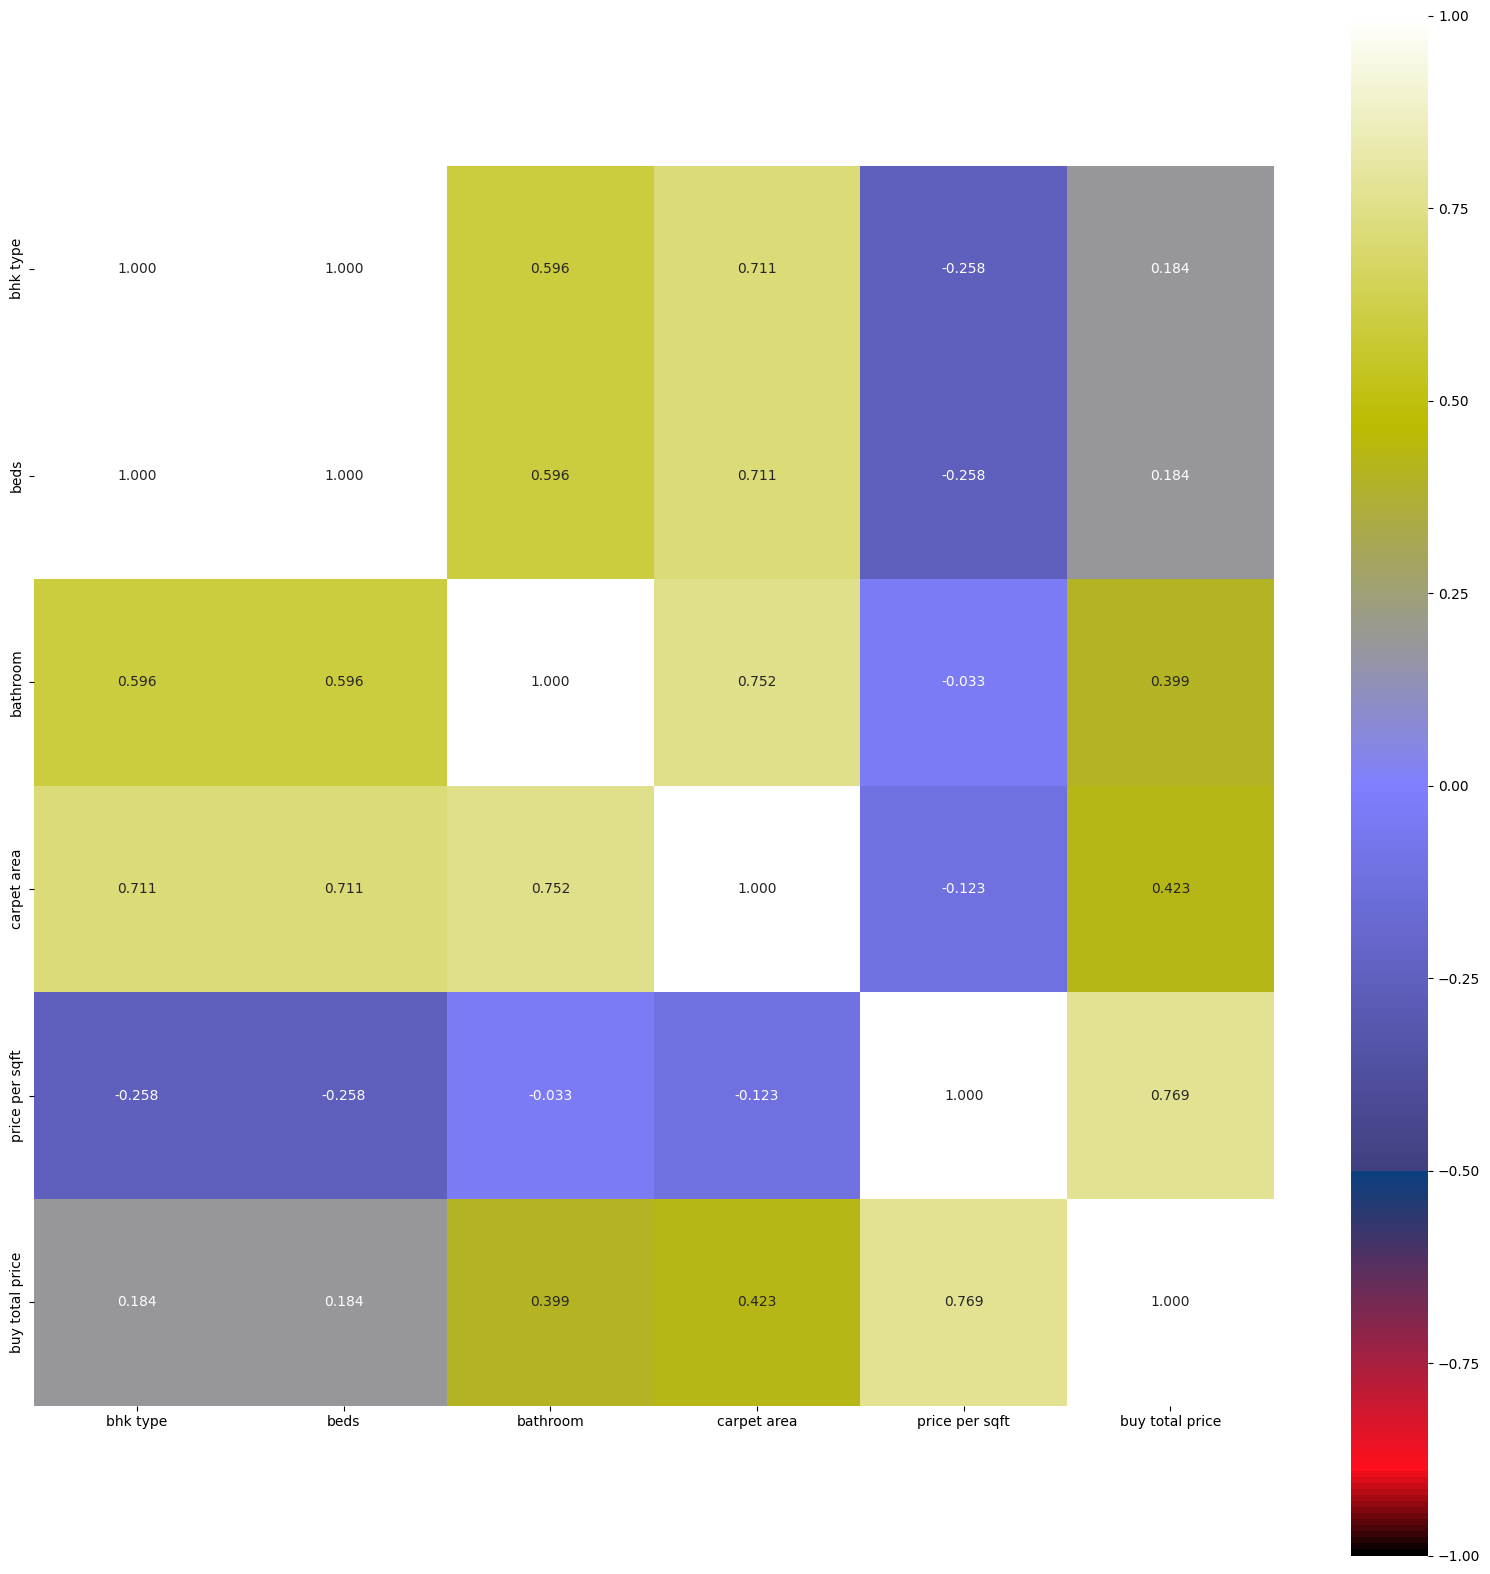

In [374]:
plt.figure(figsize=(20,20))
sns.heatmap(df[Numerical].corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

#### as we can see some features are highly corellated

## lets encode the categorical data

In [375]:
category = ["city","state code","property type"]

In [376]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()

,serial number,bhk type,property type,beds,bathroom,city,state code,country,carpet area,year built,price per sqft,buy total price
0,2,2,0,2,2,4,6,United states,920,1989.0,20915,19241716
1,3,1,0,1,1,4,6,United states,1000,1973.0,19660,19660100
2,5,3,1,3,2,4,6,United states,1334,2000.0,16933,22588200
3,6,1,0,1,1,4,6,United states,786,2000.0,29270,23006500
4,7,2,0,2,2,4,6,United states,1054,2004.0,25320,26687540


In [377]:
df.drop(columns=["country","serial number"],inplace=True)

# Machine learning model

## 1) Machine learning model for the prediction of carpet area

In [378]:
X = df.drop(["carpet area"],axis =1)
Y = df["carpet area"]

### standard scaling

In [379]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,inf,bhk type
1,1.492621,property type
2,inf,beds
3,2.206344,bathroom
4,1.308433,city
5,1.956572,state code
6,1.127487,year built
7,6.070655,price per sqft
8,5.263408,buy total price


In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [384]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (2545, 9)
Training target vector size: (2545,)
Test feature matrix size: (849, 9)
Test target vector size: (849,)


### finding best random state

In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8094791086140473 on Random_state 363


### Linear Regression Base Model

In [388]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=363, test_size=0.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted carpet area:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual carpet area:'+'\033[0m\n',Y_test)

Predicted carpet area:
 [1288.8331617  1294.86550492 1562.52798078 1509.15726389 2059.30720502
 1395.39222496 1473.75617324  342.7038246  1571.62701333 2704.5098346
 1884.25481863 1872.41243106 1528.52672857 2295.85368022 1641.13126618
 1566.01064249 1582.33710636 1206.14846559 1295.56259567 1333.07397086
 1852.47415507 1537.98473849 1573.08700208 1336.56593337 1833.40889013
 2184.54169783 1409.00043369 1650.36877252 1321.13379143 1637.65381194
  788.361966   1976.17421369 2173.79345825 1437.85107749 1838.152626
  993.27967057 1612.12329294 2330.13896771 1958.17923583 1414.35615326
 1291.68361671  678.19339387 1434.33476358 2076.24919092 3536.71514133
 2468.36728479 1271.30728539 1829.25683617 1325.21460162 1155.07541629
 2133.72473204 1446.2703852  1625.51161931  860.88671271 1603.01861719
 1111.533096    697.4735674  1895.75761999  823.14345483  199.46763125
 1790.88572679 1111.93962758 1754.39992517 3732.76422484 4396.71803717
 2076.76008517 1297.5733425  1958.97310411 1209.69060386

In [389]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 233.89058273619975
Mean squared error : 100124.41432588155
Root Mean Squared Error: 316.424421190719


 R2 Score :
0.8094791086140473


In [390]:
## cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7589587409490509


### Applying other ML Models

In [391]:
from sklearn.ensemble import BaggingRegressor

In [392]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 94.46102562984717
Mean squared error : 27515.900581470723
Root Mean Squared Error: 165.879174646701


 R2 Score :
0.9476416022868666


 Error of  ExtraTreesRegressor() :
Mean absolute error : 109.31643639575972
Mean squared error : 42542.01721626177
Root Mean Squared Error: 206.25716282413507


 R2 Score :
0.9190492838737774


 Error of  DecisionTreeRegressor() :
Mean absolute error : 137.8756183745583
Mean squared error : 55031.59029446407
Root Mean Squared Error: 234.58812905700083


 R2 Score :
0.8952836058230244


 Error of  AdaBoostRegressor() :
Mean absolute error : 307.0987674271907
Mean squared error : 138511.39265080987
Root Mean Squared Error: 372.17118729263535


 R2 Score :
0.7364347729510712


 Error of  GradientBoostingRegressor() :
Mean absolute error : 130.8882283423241
Mean squared error : 32941.297268150054
Root Mean Squared Error: 181.49737537537575


 R2 Score :
0.9373179322826233


 Error of  XGBRegressor

In [393]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('====================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9113873326448504


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.8663494350095959


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.8422504341034973


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7023412307029254


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.909529318222722


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_

### from we can see among all the model xgb regressor performed best so lets take it further

## Hyper Parameter Tuning : GridSearchCV

In [394]:
from sklearn.model_selection import GridSearchCV

In [395]:
parameter = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0.0, 0.5, 1.0],
    'reg_lambda': [0.0, 0.5, 1.0]
}

In [396]:
GCV = GridSearchCV(XGBRegressor(),parameter)

In [397]:
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0.0, 0.5, 1.0],
                         'reg_lambda': [0.0, 0.5, 1.0]})

In [398]:
GCV.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 200,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5}

### Final Regression Model

In [399]:
Final_mod =  XGBRegressor(n_estimators=200 ,  max_depth= 3, colsample_bytree=1, learning_rate=0.5, reg_alpha=0.5, reg_lambda=0.5 )

Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 59.69032138424571
Mean squared error : 9070.858142027995
Root Mean Squared Error: 95.24105281877135


 R2 Score of Final Model :
0.9827395946284404




 True Values Vs Predicted Value plot :


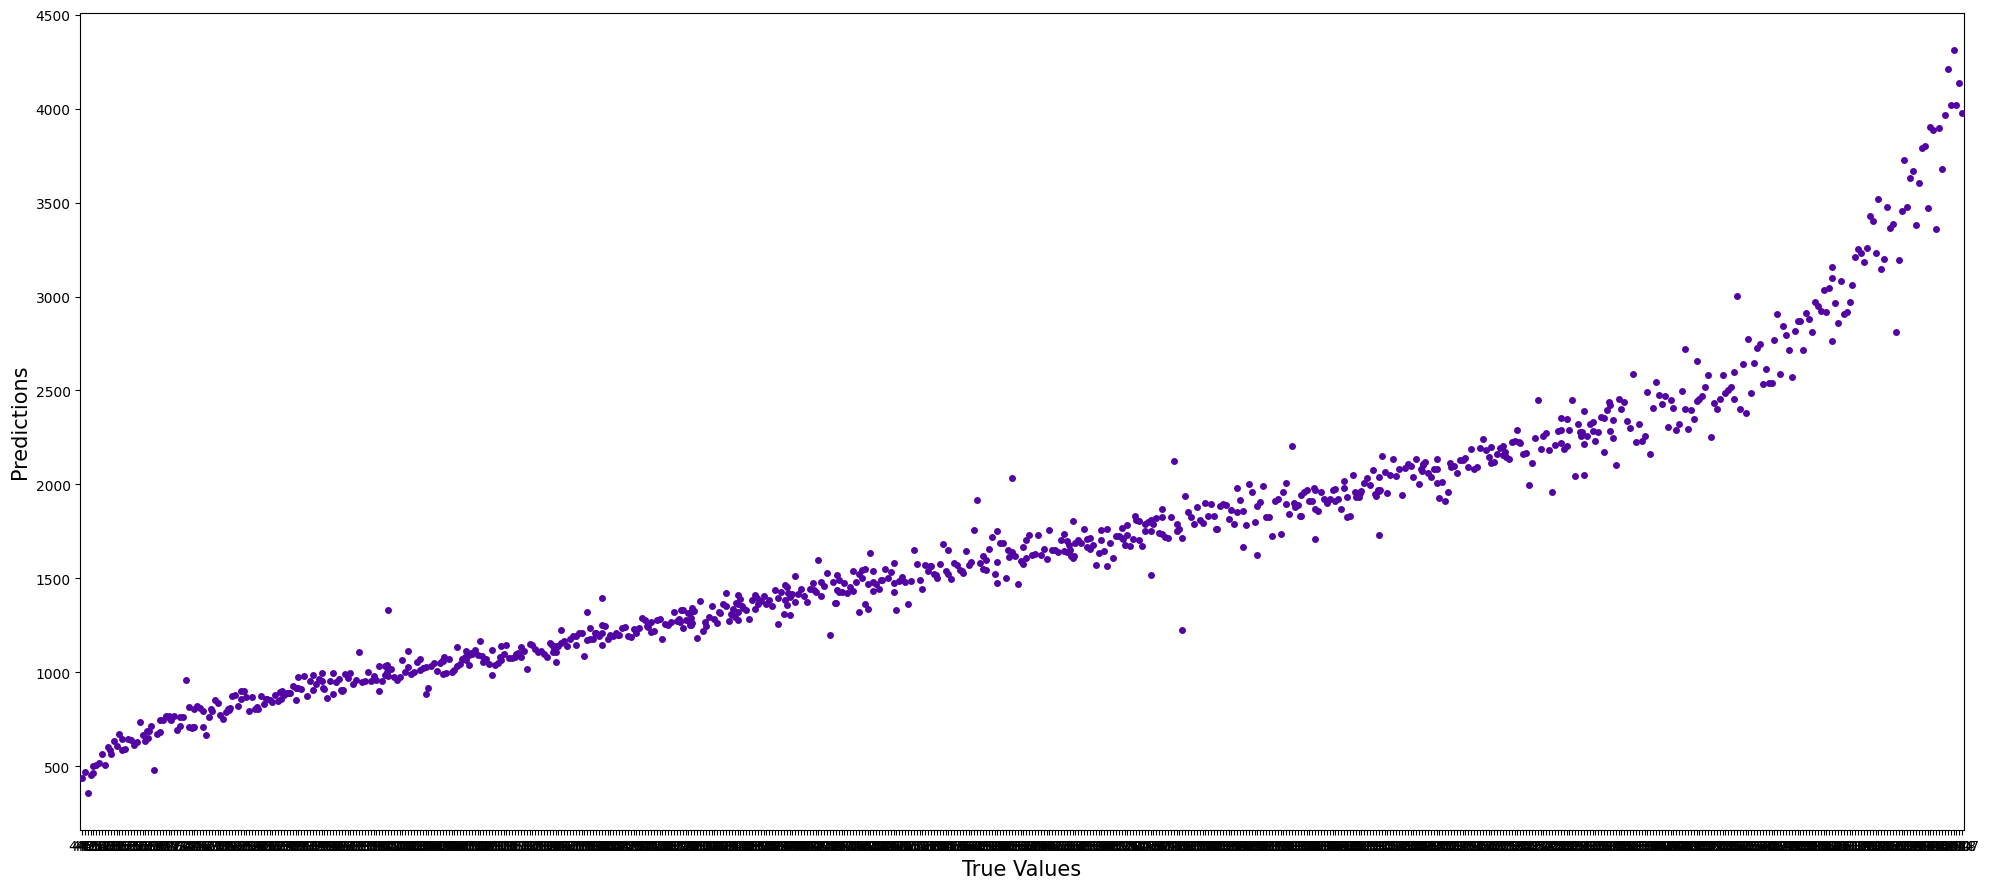

In [400]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Final Regression Saving Model

In [401]:
import joblib
joblib.dump(Final_mod,'capstone_carpet_area.pkl')

['capstone_carpet_area.pkl']

### Prediction According Final Regression Model

In [402]:
# Loading the saved model
Model = joblib.load('capstone_carpet_area.pkl')

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted.sample(30)

,Actual Values,Predicted Values
761,1208,1175.439819
112,4100,3678.255615
494,605,608.662415
125,2988,3037.013916
829,1958,1979.944214
670,1388,1351.740601
530,2192,2223.612061
132,1115,1075.806396
422,1018,989.265259
495,2325,2354.760498


## 2) machine learning model for Buy total price

In [405]:
# Splitting data in target and dependent feature
X = df.drop(['buy total price'], axis =1)
Y = df['buy total price']

In [406]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [407]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (2545, 9)
Training target vector size: (2545,)
Test feature matrix size: (849, 9)
Test target vector size: (849,)


### Finding best Random state

In [408]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8952463690095072 on Random_state 360


### Linear Regression Base Model

In [409]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=360, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted total price:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual total price:'+'\033[0m\n',Y_test)

Predicted total price:
 [ 5.54132755e+07  9.39579402e+07  1.42079545e+07 -1.90368605e+06
  8.33846875e+07  1.19107835e+07  1.64851757e+08  1.10095243e+07
  4.71980316e+07  1.62093016e+07  4.42363257e+07  1.71219639e+07
  7.80711710e+07  2.96750777e+06  6.02552025e+07  1.59449138e+07
  8.10103025e+06  9.69071626e+07  1.83743026e+08  1.17602715e+08
  2.31044752e+07  1.15312872e+07  1.77977241e+07  4.90067890e+07
  5.57117774e+07  3.78049376e+07  2.32870670e+07  3.29588244e+07
  1.44620978e+07  2.88316967e+07  7.98871444e+07  6.21279773e+07
  2.32879268e+07  3.82957599e+07  8.20487969e+07  1.96438910e+07
  6.45297026e+07  8.65456310e+07  2.52775109e+07  1.89337770e+07
  2.20002555e+07  3.49940219e+07  9.66508500e+06  2.87843481e+07
  5.08775379e+07  1.02671239e+07  1.72113728e+07  5.51166534e+07
  9.81777232e+06  1.80638197e+07  1.55399797e+08  3.67467058e+07
  4.34552054e+07  1.00180503e+08  4.77531488e+07  4.14612084e+07
  1.26295758e+06  1.63060427e+07  4.99554061e+07  2.97983511e+07
 

### Linear Regression Evaluation Matrix

In [410]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 9031096.868459107
Mean squared error : 198531181338033.16
Root Mean Squared Error: 14090109.344431404


 R2 Score :
0.8952463690095072


In [413]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7679676322212555


### Applying other ML Models

In [414]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 1090538.3378327442
Mean squared error : 7078564310970.5205
Root Mean Squared Error: 2660557.142962827


 R2 Score :
0.9962650435625457


 Error of  ExtraTreesRegressor() :
Mean absolute error : 1063741.0185041225
Mean squared error : 7519193604240.165
Root Mean Squared Error: 2742114.8050802257


 R2 Score :
0.9960325485051967


 Error of  DecisionTreeRegressor() :
Mean absolute error : 2604965.6077738516
Mean squared error : 42770765536864.32
Root Mean Squared Error: 6539936.202813015


 R2 Score :
0.9774322957228521


 Error of  AdaBoostRegressor() :
Mean absolute error : 8676588.638730414
Mean squared error : 134171306410747.73
Root Mean Squared Error: 11583233.8494372


 R2 Score :
0.9292054203952331


 Error of  GradientBoostingRegressor() :
Mean absolute error : 1743331.7927209185
Mean squared error : 9767523706143.19
Root Mean Squared Error: 3125303.7782179173


 R2 Score :
0.9948462323796781


 Error of  XGBRegressor(

In [415]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.9914948686496547


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.9837490875677808


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.9732443201779079


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.8494578273435307


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.9915511957197285


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

#### Here the randoom forest performed best so we will use it in further process

In [417]:
### Hyper Parameter Tuning : GridSearchCV

In [418]:
from sklearn.model_selection import GridSearchCV


In [419]:
parameter = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20]
}

In [420]:
GCV = GridSearchCV(RandomForestRegressor(),parameter)
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [421]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

### Final Regression Model

In [423]:
Final_mod =  RandomForestRegressor(n_estimators=50 , max_depth= 20,max_features="auto",max_leaf_nodes=None, min_samples_leaf=1,min_samples_split =2 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 1071235.8663263018
Mean squared error : 6089739248063.783
Root Mean Squared Error: 2467739.704276726


 R2 Score of Final Model :
0.9967867903987645




 True Values Vs Predicted Value plot :


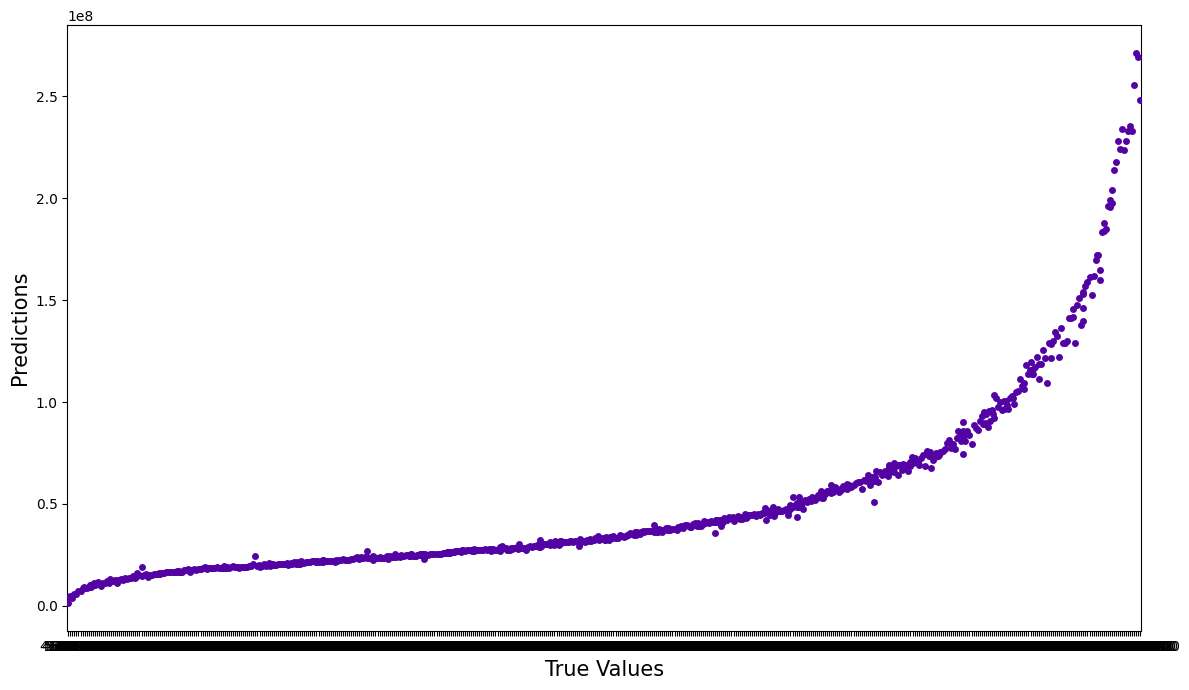

In [424]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Saving Final Regression Model 

In [426]:
import joblib
joblib.dump(Final_mod,'capstone_total_price.pkl')

['capstone_total_price.pkl']

### Prediction According Final Regression Model

In [427]:
# Loading the saved model
Model = joblib.load("capstone_total_price.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted.sample(30)

,Actual Values,Predicted Values
829,60653416,6.059076e+07
708,150169700,1.528518e+08
470,46013000,4.610954e+07
482,24804353,2.464637e+07
139,33455634,3.347284e+07
413,47677834,4.665451e+07
523,29281000,3.026635e+07
436,19651734,2.437131e+07
811,30527534,3.060915e+07
793,33380340,3.310558e+07


### 3) machine learning model for Property type

In [435]:
X = df.drop(["property type"],axis=1)
Y = df["property type"]

In [436]:
Y.value_counts()

property type
1    2055
0     737
2     602
Name: count, dtype: int64

### Oversampling

In [437]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,Y=SM.fit_resample(X,Y)

In [438]:
Y.value_counts()

property type
0    2055
1    2055
2    2055
Name: count, dtype: int64

### standard scaling

In [439]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

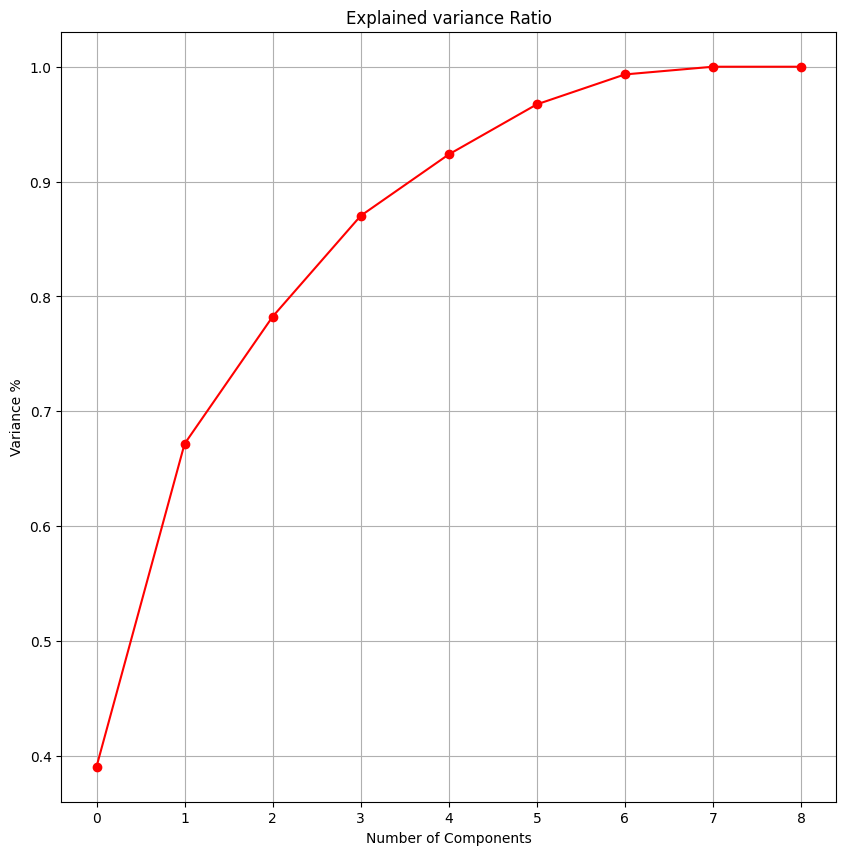

In [440]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### observaitons and conclusion:
- AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 6 components for our prediction

In [441]:
pca_new = PCA(n_components=6)
x_new = pca_new.fit_transform(X_scale)

In [442]:
principle_x=pd.DataFrame(x_new,columns=np.arange(6))

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ",maxAccu,"at random_state ",maxRS)

Best accuracy is  0.9281081081081081 at random_state  16


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=maxRS)

In [ ]:
### classification algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [443]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [444]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [445]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4130, 6)
Training target vector size: (4130,)
Test feature matrix size: (2035, 6)
Test target vector size: (2035,)


### finding best random state

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8235872235872236 on Random_state 87


In [447]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=87, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8235872235872236


Confusion matrix of Logistics Regression : 
 [[548  50  57]
 [ 67 579  54]
 [ 66  65 549]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       655
           1       0.83      0.83      0.83       700
           2       0.83      0.81      0.82       680

    accuracy                           0.82      2035
   macro avg       0.82      0.82      0.82      2035
weighted avg       0.82      0.82      0.82      2035



###  Finding Optimal value of n_neighbors for KNN

In [448]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.48718213980649716
RMSE value for k=  2 is: 0.5236425061064793
RMSE value for k=  3 is: 0.5093716319736107
RMSE value for k=  4 is: 0.4966719709053921
RMSE value for k=  5 is: 0.49913930834993264
RMSE value for k=  6 is: 0.5064692058862577
RMSE value for k=  7 is: 0.5108166607831629
RMSE value for k=  8 is: 0.5127370309420444
RMSE value for k=  9 is: 0.5160804843617576
RMSE value for k=  10 is: 0.5117777466014538
RMSE value for k=  11 is: 0.5175067804514911
RMSE value for k=  12 is: 0.5084059976796679
RMSE value for k=  13 is: 0.507438525827373
RMSE value for k=  14 is: 0.5151274263289282
RMSE value for k=  15 is: 0.5122576133234745
RMSE value for k=  16 is: 0.5103354391400429
RMSE value for k=  17 is: 0.5079224921041182
RMSE value for k=  18 is: 0.5050117375238471
RMSE value for k=  19 is: 0.4961770311004392
RMSE value for k=  20 is: 0.504524979109513
RMSE value for k=  21 is: 0.5079224921041182
RMSE value for k=  22 is: 0.5132160007157448
RMSE value for k=  

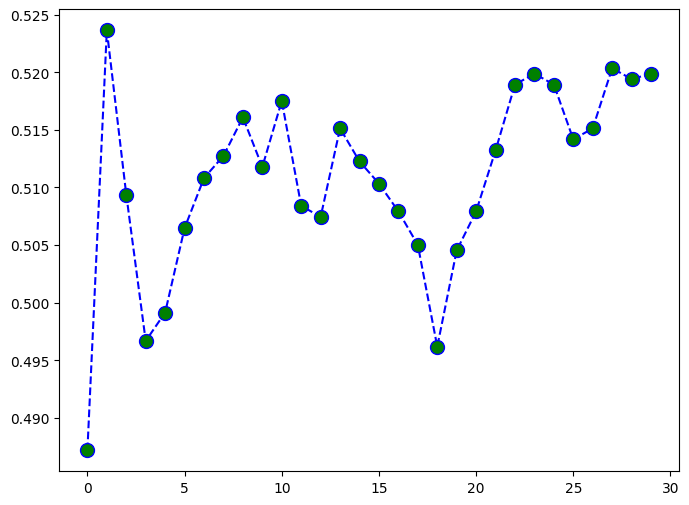

In [449]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Observaitons and conclusions:
- At k= 1, we get the minimum RMSE value which approximately0.48718213980649716, and shoots up on further increasing the k value. We can safely say that k=1 will give us the best result in this case

### Applying other classification algorithm

In [450]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 1),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8796068796068796


Confusion matrix : 
 [[601  31  23]
 [ 37 634  29]
 [ 60  65 555]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       655
           1       0.87      0.91      0.89       700
           2       0.91      0.82      0.86       680

    accuracy                           0.88      2035
   macro avg       0.88      0.88      0.88      2035
weighted avg       0.88      0.88      0.88      2035



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8142506142506143


Confusion matrix : 
 [[548  48  59]
 [ 64 548  88]
 [ 62  57 561]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       655
           1       0.84      0.78      0.81       700
           2       0.79      0.82      0.81       680

    accura

#### We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score. so we will continue further investigation with crossvalidation of above model

### CrossValidation

In [451]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 1),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.46390916 0.4703974  0.47201946 0.46553122 0.44849959]
Mean Score : 0.4640713706407137
Std deviation : 0.008340606736209212




Cross Validation Score SVC() :

Score : [0.37793998 0.38767234 0.40875912 0.50202758 0.48094079]
Mean Score : 0.4314679643146796
Std deviation : 0.050448413482042494




Cross Validation Score GaussianNB() :

Score : [0.54744526 0.50283861 0.57664234 0.57583131 0.51013788]
Mean Score : 0.5425790754257908
Std deviation : 0.031373341235139275




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69829684 0.80129765 0.72506083 0.66423358 0.85320357]
Mean Score : 0.748418491484185
Std deviation : 0.06916788009247889




Cross Validation Score KNeighborsClassifier(n_neighbors=1) :

Score : [0.61476075 0.6107056  0.64801298 0.67883212 0.7080292 ]
Mean Score : 0.6520681265206812
Std deviation : 0.037328531681797304




Cross Validation Score RandomForestClassifier() :

Score : [0.70884023 0.806974

#### On basis of maximum score in crossvalidation of Random Forest Classifier. we will apply Hyperparameter tuning on Random Forest model¶

## Hyper Parameter Tuning : GridSearchCV

In [452]:
from sklearn.model_selection import GridSearchCV

In [453]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [454]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [455]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 50}

## Final Model

In [456]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 50, max_depth=40 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9012285012285012


### Saving the final model

In [458]:
import joblib
joblib.dump(Final_mod,'capstone_property_type.pkl')

['capstone_property_type.pkl']

### Predictiong from the saved model

In [459]:
# lets load the saved modle and get the predictions
model = joblib.load("capstone_property_type.pkl")

#predictions
prediction = model.predict(X_test)
prediction

array([2, 2, 1, ..., 0, 2, 1])

In [460]:
a = np.array(Y_test)
df=pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df.sample(30)

,predicted,original
1805,1,1
664,1,1
1363,2,2
1163,1,1
1158,0,0
1757,1,1
1796,2,2
25,1,2
1790,2,2
792,2,2
